In [ ]:
import numpy as np 

def repeat(X,Y, Z, x, y, z, i):
  for j in range(i):
    if(X[j] == x and Y[j] == y and Z[j]==z) :
      return (True)
  
  return (False)
  
direction_x = (1,-1,0,0,0,0)
direction_y = (0,0,1,-1,0,0)
direction_z = (0,0,0,0,1,-1)

import random 
import math 

def total_energy(s, X, Y, Z):
  energy = 0 
  bonds = []
  points = [(h, x, y, z) for (h, x, y, z) in  zip(s, X, Y, Z)]
  visited = []
  for i, (h, x, y, z) in enumerate(points): #for each point on the restriced random walk
    if h == "H":
      for neighbor in [('H', x+1, y), ('H', x-1, y), ('H', x, y+1), ('H', x, y-1),]: #na 6 sąsiadów
        if i > 1 and  i < len(s) - 1:
          if neighbor in points and neighbor  != ('H', X[(i+1)], Y[(i + 1)], Z[(i+1)]) and neighbor  != ('H', X[i-1], Y[i - 1], Z[i-1]) and [(x, y, z), (neighbor[1], neighbor[2], neighbor[3])] not in bonds: #checks if the neighbor is in the restriced random walk  
            energy -= 1
            bonds.append([(neighbor[1], neighbor[2]), (x, y)])
  return energy, np.asarray(bonds)
def simulation(k, s):
  n = 10**5
  W = np.zeros(n)
  energy = np.zeros(n)
  trajectories = np.zeros((n,k,3))
  for i in range(n):
    X = np.zeros(k)
    Y = np.zeros(k)
    Z = np.zeros(k)
    W[i] = 1 #weights list
    for j in range(1,k+1):
      # we check which movement numbers are acceptable
      positions = []
      if(not repeat(X, Y, Z, X[j-1]+direction_x[0], Y[j-1] + direction_y[0], Z[j-1] + direction_z[0], j-1) ):
        positions.append(0)
      if(not repeat(X, Y, Z, X[j-1]+direction_x[1], Y[j-1] + direction_y[1], Z[j-1] + direction_z[1], j-1) ):
        positions.append(1)
      if(not repeat(X, Y, Z, X[j-1]+direction_x[2], Y[j-1] + direction_y[2], Z[j-1] + direction_z[2], j-1) ):
        positions.append(2)
      if(not repeat(X, Y, Z, X[j-1]+direction_x[3], Y[j-1] + direction_y[3], Z[j-1] + direction_z[3], j-1) ):
        positions.append(3)
      if(not repeat(X, Y, Z, X[j-1]+direction_x[4], Y[j-1] + direction_y[4], Z[j-1] + direction_z[4], j-1) ):
        positions.append(4)
      if(not repeat(X, Y, Z, X[j-1]+direction_x[5], Y[j-1] + direction_y[5], Z[j-1] + direction_z[5], j-1) ):
        positions.append(5)
      ###
      if( len(positions) == 0 ):
        W[i] = 0
        # non-extendable fold
        break
      ###
      else:
        W[i] = W[i] * len(positions)
        
        U = random.choice(positions)
        if j == k:
          break
        X[j] = X[j-1] + direction_x[U]
        Y[j] = Y[j-1] + direction_y[U]
        Z[j] = Z[j-1] + direction_z[U]
    if W[i] != 0:
      energy[i], bonds = total_energy(s, X, Y, Z)  
      trajectories[i,:,0] = X
      trajectories[i,:,1] = Y
      trajectories[i,:,2] = Z
  return (stat.mean(W), trajectories, energy, bonds)

dimension:1, self avoiding random walk: 6.0, 0.0, H
dimension:2, self avoiding random walk: 30.0, 0.0, HP
dimension:3, self avoiding random walk: 150.0, 0.0, HPH
dimension:4, self avoiding random walk: 726.093, 0.0, HPHP
dimension:5, self avoiding random walk: 3534.8025, 0.0, HPPHP
dimension:6, self avoiding random walk: 16928.4675, 0.0, HPPHPH
dimension:10, self avoiding random walk: 8807040.3375, 0.0, HHPPPPHHHP
dimension:18, self avoiding random walk: 2241234138351.5625, 0.0, HHPPPPPHHPPPHPPPHP
dimension:18, self avoiding random walk: 2239991553395.625, 0.0, HPHPPHHPHPPHHPPHPH
dimension:24, self avoiding random walk: 2.4776796891665252e+16, 0.0, PPHPHPHPPPPHHPPPPHHPPPPH
dimension:25, self avoiding random walk: 1.1658696555396226e+17, 0.0, PPHPHPHPPPPHHPPPPHHPPPPHH


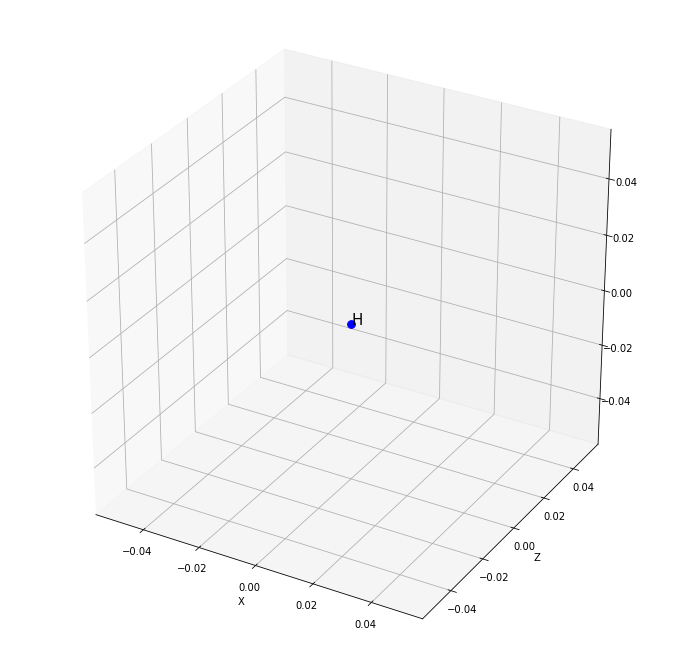

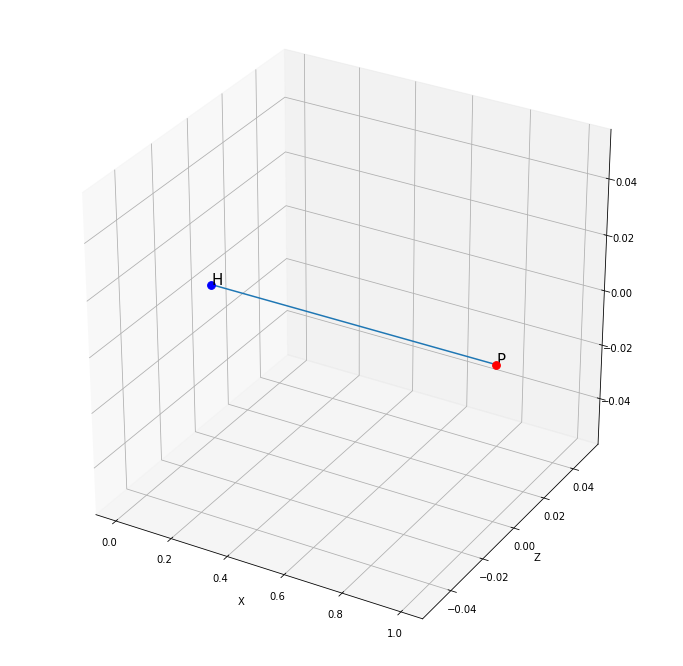

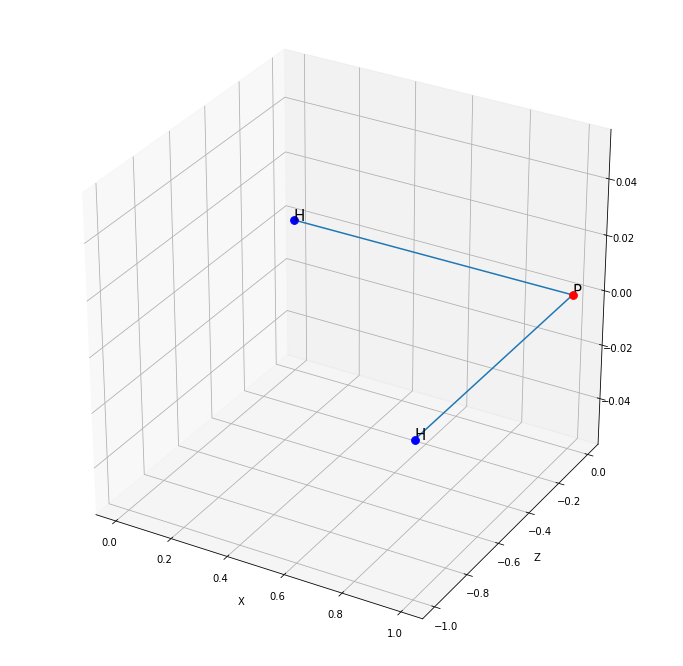

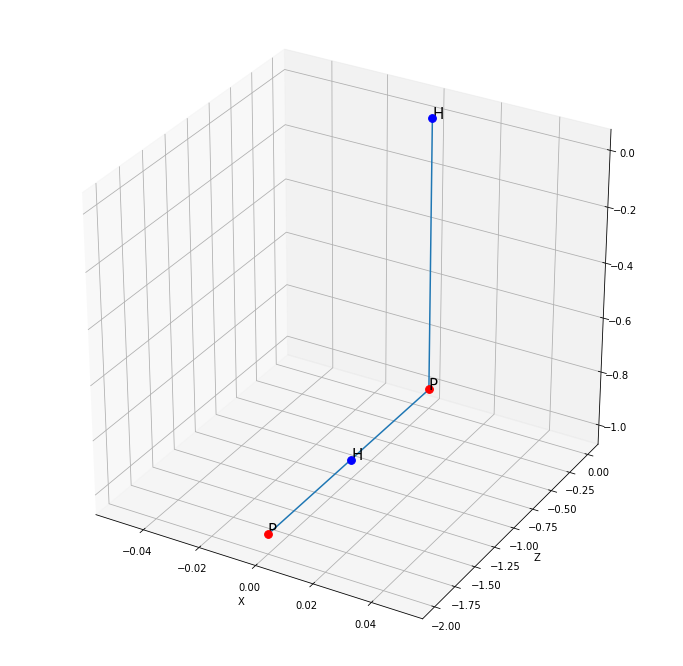

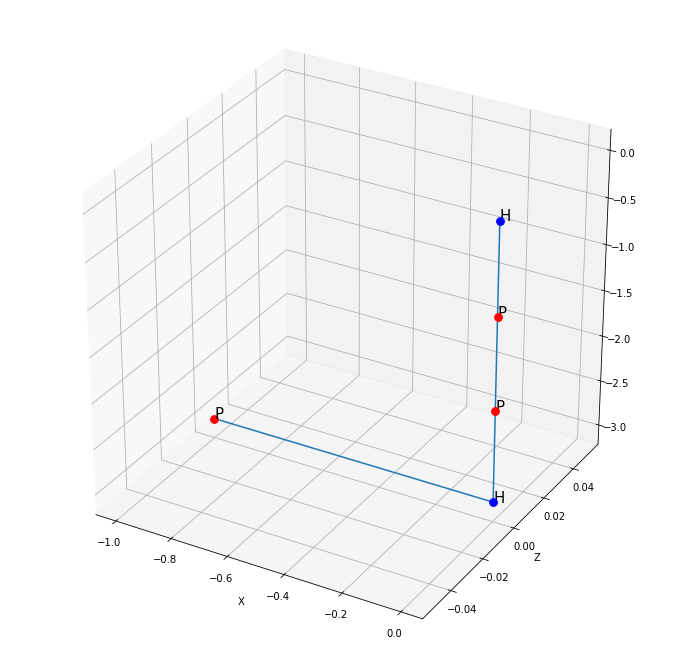

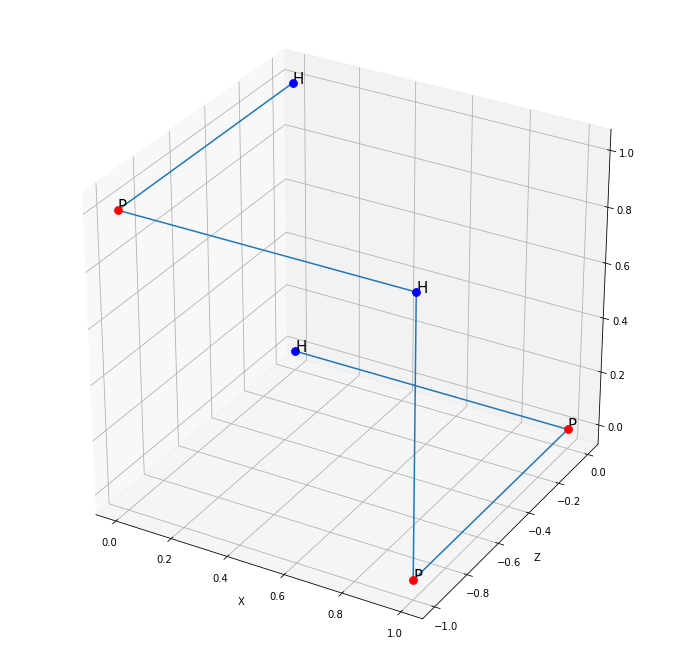

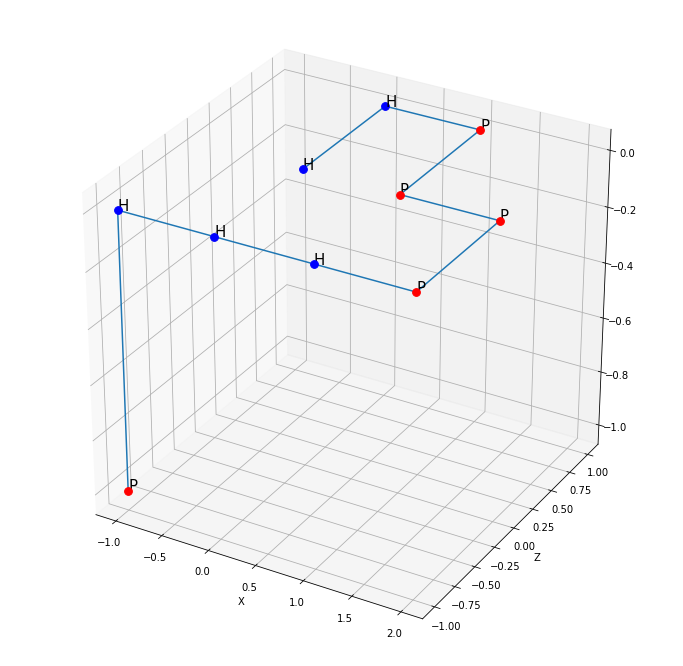

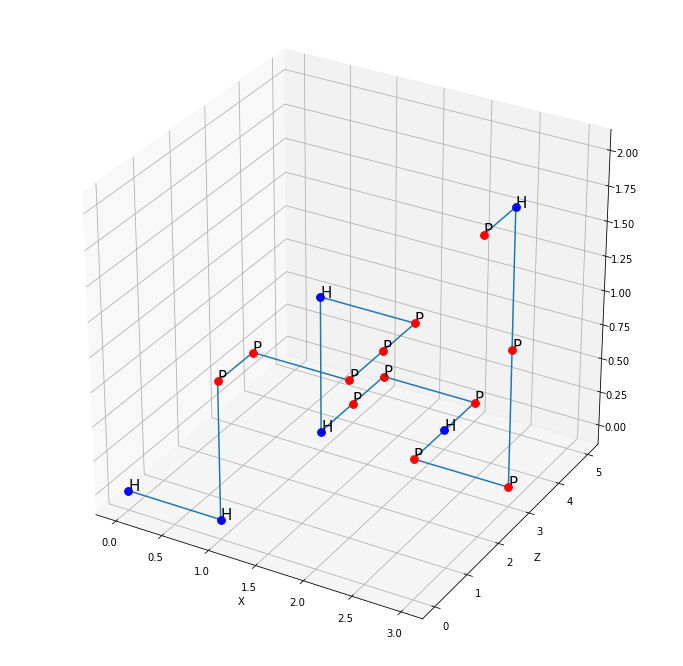

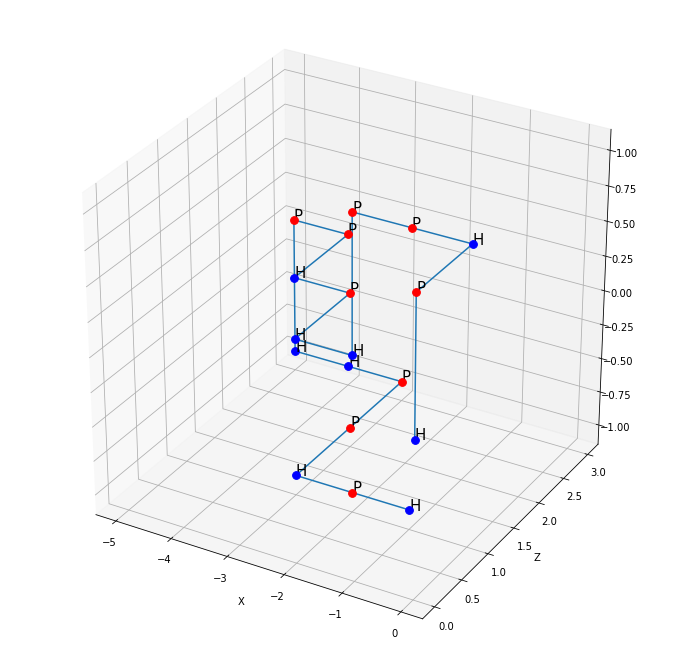

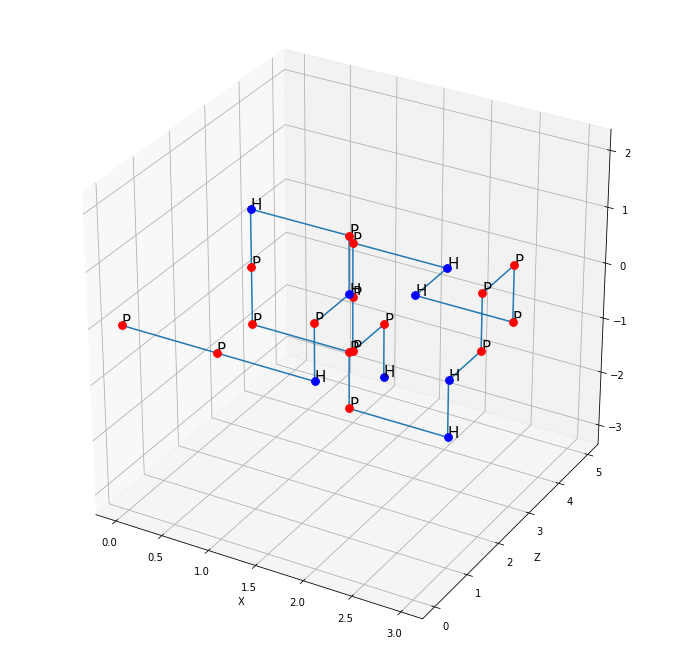

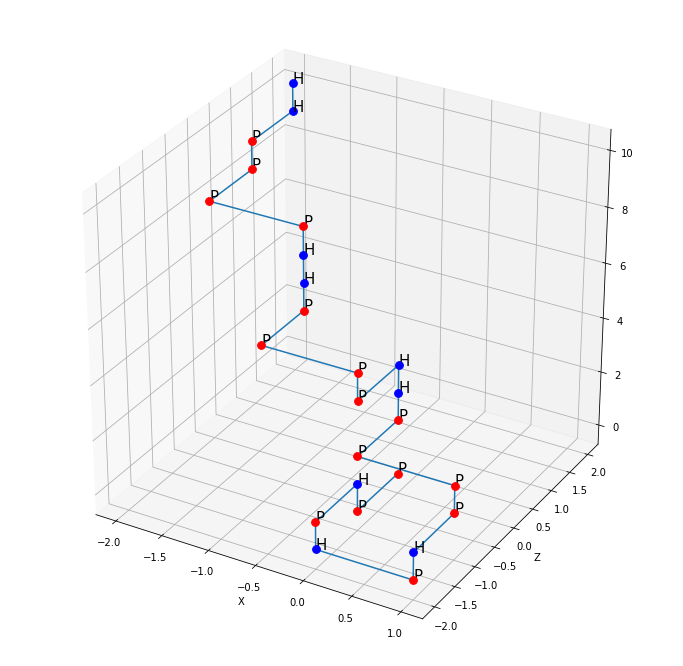

In [ ]:
import statistics  as stat
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
sequences = ['H', 'HP', 'HPH', 'HPHP' , 'HPPHP', 'HPPHPH','HHPPPPHHHP', 'HHPPPPPHHPPPHPPPHP', 'HPHPPHHPHPPHHPPHPH','PPHPHPHPPPPHHPPPPHHPPPPH' ,'PPHPHPHPPPPHHPPPPHHPPPPHH']

lenghts = []

for k, s in zip([len(x) for x in sequences], sequences):
  w, trajectories, e, bonds = simulation(k, s)
  print(f'dimension:{k}, self avoiding random walk: {w}, {min(e)}, {s}')
  X = trajectories[np.argmin(e),:,0]
  Y = trajectories[np.argmin(e),:,1]
  Z = trajectories[np.argmin(e),:,2]

  fig = plt.figure(figsize=(12, 12))
  ax = fig.add_subplot(projection='3d')
  ax.plot(X, Y, Z, label='Random walk')
  for i in range(len(X)):
    if s[i] == 'H':
      ax.scatter(X[i], Y[i], Z[i], c='b', marker='o', s = 60)   # End point
    else:
      ax.scatter(X[i], Y[i], Z[i], c='r', marker='o', s = 60)   # End point
    ax.text(X[i], Y[i], Z[i], s[i], size=15)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_ylabel('Z')
  for i in range(bonds.shape[0]):
    ax.plot([bonds[i][0][0], bonds[i][1][0]], [points[i][0][1], points[i][1][1]], [points[i][0][2], points[0][1][2]], color='green',linestyle='dashed')
  plt.savefig(f'3D{s}.png')